# Unsolved Homicides

## The Plan
### Scrape data from OH-AG website
- [x] Don't break their website
- [x] Create dataframe of cases
### Basic stats
- Bar graph of cases?
- oldest case
- avg / median age of case
    - distribution plot + highlight median value
- avg / median age of victim
- oldest / youngest victims
- pie chart of ethnicity
- Age of case vs Agency
### GIS
- Map cases
    - Different symbol for different gender
    - Decreasing color value for 0-4, 5-9, 10-14, +15 year old cases
- Heat map by neighborhood
    - by street / block
- Time of day vs location
- [ ] create custom icons https://leafletjs.com/examples/custom-icons/  
    https://github.com/Leaflet/Leaflet/tree/main/src/images  
    https://stackoverflow.com/questions/23567203/leaflet-changing-marker-color/61982880#61982880  
    https://github.com/lennardv2/Leaflet.awesome-markers
## Other
 - [x] Manually extract age from ['details']
     - [ ] Manually extract homicide method? eg; knife, gun? There's ~500 entries....
     - surprising / depressing number of infant homicides & entire families
 - [ ] Histogram
     - [x] by Age
     - [ ] Time since incident
     - [x] Month
     - [x] Sex
 - [ ] Correlogram ?
 - [ ] Summary statistics
 - I'll probably have to clean up the ['Incident location'] data in order to use it in mapping. I *should* be able to automate it
     - [ ] clean location data ?  
     

## Blog post notes
One of the earliest, and by most accounts, most successful examples of a DOJ agreement that produced lasting results was in Cincinnati, where the mayor requested an investigation in 2001, and the decree was finally lifted in 2007.  

[Cincinnati Agreement Article](https://www.csmonitor.com/USA/Justice/2015/0528/Cleveland-police-reform-Why-federal-oversight-matters)  

[Cincinnati DOJ Agreement](https://www.cincinnati-oh.gov/police/department-references/department-of-justice-agreement/)  

figure.twinx()
[Axes.fill_between()](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.fill_between.html)  

[pyplot.axvspan()](https://matplotlib.org/2.0.2/api/pyplot_api.html#matplotlib.pyplot.axvspan)  

https://matplotlib.org/stable/gallery/lines_bars_and_markers/fill_between_demo.html#selectively-marking-horizontal-regions-across-the-whole-axes  

https://docs.astraea.earth/hc/en-us/articles/360049694972-How-to-Display-Vector-Data-on-a-Base-Map-Using-Folium  

## set color  opacity
The hex code #00ff00 represents the green color, and 80 represents the opacity of the color. This will create a green background in the text and give the opacity of 50% or the value 128. The binary equivalent of the hexadecimal value 80 is 128. Thus, we can use hex code to create a transparent element in HTML.
```#RRGGBBAA```0-255; 00-FF

## links
 
- https://www.murderdata.org
- https://projectcoldcase.org

In [611]:
                                                         # jupyter v1.0.0
import pandas as pd                                      # v1.4.3
import numpy as np
import geopandas as gpd  # will I use this?                v0.8.2
from matplotlib import pyplot as plt                     # v3.5.2
from bokeh.io import output_notebook, show
from bokeh import plotting
import folium                                            # v0.12.1.post1
output_notebook()
'''
isa_colors = ['yellow' = '#FCF434'
'dark yellow' = '#e4de49'
'lavender' = '#cc94f8'
'purple' = '#9C59D1'
'dark purple' = '#401066'
'charcoal' = '#7e7c7c'
'black' = '#2C2C2C'
'light pink'= '#e58cba'
'pink' = '#D60270'
'periwinkle' = '#99b9fa'
'blue' = '#0038A8'
'''

Loading BokehJS ...

"\nisa_colors = ['yellow' = '#FCF434'\n'dark yellow' = '#e4de49'\n'lavender' = '#cc94f8'\n'purple' = '#9C59D1'\n'dark purple' = '#401066'\n'charcoal' = '#7e7c7c'\n'black' = '#2C2C2C'\n'light pink'= '#e58cba'\n'pink' = '#D60270'\n'periwinkle' = '#99b9fa'\n'blue' = '#0038A8'\n"

In [848]:
from folium.features import DivIcon

In [612]:
cases = pd.read_csv('unsolved_OH.csv')
case_df = cases.T.copy()
case_df.head(4)

0                                                  1   \
Unnamed: 0  Case number                                  Incident location   
618                 618   3540 Reading RoadCincinnati, \n              ...   
632                 632   5438 Madison RoadCincinnati, \n              ...   
622                 622   201 Peete StreetCincinnati, \n               ...   

                       2              3       4               5   \
Unnamed: 0  Incident date  Homicide date  Gender  Race/Ethnicity   
618              1/2/2011       1/2/2011    Male           Black   
632             5/26/2011      5/26/2011    Male           Black   
622              3/1/2011       3/1/2011    Male           Black   

                                       6   \
Unnamed: 0         Law enforcement agency   
618          Cincinnati Police Department   
632          Cincinnati Police Department   
622          Cincinnati Police Department   

                                                           7    8   \
Unnamed: 0                                            details  Age   
618          Twenty two year old Rafeal Ross was shot at 3...   22   
632          Nineteen year old David Gould was shot at 438...   19   
622          Twenty five year old Patrick Massey was shot ...   25   

                    9          10                 11             12      13  \
Unnamed: 0  Hair color  Eye color  Nickname or alias  Date of birth  Height   
618                NaN        NaN                NaN            NaN     NaN   
632                NaN        NaN                NaN            NaN     NaN   
622                NaN        NaN                NaN            NaN     NaN   

                14  
Unnamed: 0  Weight  
618            NaN  
632            NaN  
622            NaN

## Exploring the Data
- [x] Transpose to more standard format
- [x] Check data types
    - [x] Clean up ['Incident date'] 
        - [x] Isolate date ranges
        - [x] Date ranges truncated to initial date
        - [x] Convert date ranges to datetime object
        - [x] Convert ['Incident date'] to datetime object
        - [x] Update ['Incident date'] to complete dates for maximum number of cases
- [x] Handle empty values
    - dropped

In [3]:
case_df.shape

(478, 15)

In [3]:
case_df.dtypes

0     object
1     object
2     object
3     object
4     object
5     object
6     object
7     object
8     object
9     object
10    object
11    object
12    object
13    object
14    object
dtype: object

In [613]:
case_df.columns = case_df.iloc[0]
case_df = case_df.drop(case_df.index[0], axis=0)
case_df.head()

Unnamed: 0 Case number                                  Incident location  \
618                618   3540 Reading RoadCincinnati, \n              ...   
632                632   5438 Madison RoadCincinnati, \n              ...   
622                622   201 Peete StreetCincinnati, \n               ...   
635                635   23 Back StreetCincinnati, \n                O...   
637                637   1891 Biegler StreetCincinnati, \n            ...   

Unnamed: 0 Incident date Homicide date Gender Race/Ethnicity  \
618             1/2/2011      1/2/2011   Male          Black   
632            5/26/2011     5/26/2011   Male          Black   
622             3/1/2011      3/1/2011   Male          Black   
635            6/26/2011     6/26/2011   Male          Black   
637            7/22/2011     7/22/2011   Male          Black   

Unnamed: 0         Law enforcement agency  \
618          Cincinnati Police Department   
632          Cincinnati Police Department   
622          Cincinnati Police Department   
635          Cincinnati Police Department   
637          Cincinnati Police Department   

Unnamed: 0                                            details Age Hair color  \
618          Twenty two year old Rafeal Ross was shot at 3...  22        NaN   
632          Nineteen year old David Gould was shot at 438...  19        NaN   
622          Twenty five year old Patrick Massey was shot ...  25        NaN   
635          Eighteen year old Dion Thomas was shot at 23 ...  18        NaN   
637          Forty five year old Roger Holmes was shot at ...  45        NaN   

Unnamed: 0 Eye color Nickname or alias Date of birth Height Weight  
618              NaN               NaN           NaN    NaN    NaN  
632              NaN               NaN           NaN    NaN    NaN  
622              NaN               NaN           NaN    NaN    NaN  
635              NaN               NaN           NaN    NaN    NaN  
637              NaN               NaN           NaN    NaN    NaN

In [614]:
# Age needs to be float because of infants.
case_df = case_df.astype({'Case number':int, 'Age': 'float32'}, copy=True)

In [6]:
case_df.dtypes

Unnamed: 0
Case number                 int32
Incident location          object
Incident date              object
Homicide date              object
Gender                     object
Race/Ethnicity             object
Law enforcement agency     object
details                    object
Age                       float32
Hair color                 object
Eye color                  object
Nickname or alias          object
Date of birth              object
Height                     object
Weight                     object
dtype: object

In [615]:
# Replace ranges of ['Incident date']s with initial date
date_error_df =  pd.to_datetime(case_df['Incident date'], errors='coerce')
nat_df = date_error_df[date_error_df.isna()==True]

In [616]:
nat_cases = list(nat_df.index.astype(int))
nat_cases

[1008,
 842,
 676,
 650,
 688,
 689,
 829,
 690,
 751,
 3142,
 850,
 3216,
 66,
 287,
 288,
 289]

In [617]:
# data frame of cases that have Not a date Time values
nat_case_df = case_df[case_df['Case number'].isin(nat_cases)].copy()
#6/21/2008 - 8/7/2009 (Approximate) 	
nat_column = nat_case_df['Incident date'].str.split(pat='-', expand=True)
# drop '- | 8/7/2009' columns
nat_column.drop(labels=1, axis=1, inplace=True)
nat_column.rename(columns={0:'Incident date'}, inplace=True)

In [618]:
nat_column['Case number'] = nat_column.index
nat_column.head()

Incident date Case number
1008    6/21/2008         1008
842     5/26/1998          842
676        Unknown         676
650        Unknown         650
688    10/22/1969          688

In [619]:
incident_date_dt = pd.DataFrame(pd.to_datetime(nat_column['Incident date'], yearfirst=True, errors='coerce'))
incident_date_dt['Incident date'] = incident_date_dt['Incident date'].astype('<M8[ns]')
incident_date_dt.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16 entries, 1008 to 289
Data columns (total 1 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Incident date  14 non-null     datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 256.0+ bytes


In [620]:
incident_date_dt.loc['688']['Incident date'].dtype()

AttributeError: 'Timestamp' object has no attribute 'dtype'

## Changed case_df to case_df1 <<<< change back once fixed

In [81]:
''' for troubleshooting
case_df1 = case_df.copy()
case_df1['Incident date'].astype('datetime64[ns]')
'''

In [621]:
# don't try to use format=' ' this data breaks it and everything turns into NaTs
# https://docs.python.org/3/library/datetime.html#strftime-and-strptime-behavior
case_df['Incident date'] = pd.to_datetime(case_df['Incident date'], errors='coerce')
case_df['Incident date'] = case_df1['Incident date'].astype('datetime64[ns]')

In [622]:
case_df['Incident date']

618    2011-01-02
632    2011-05-26
622    2011-03-01
635    2011-06-26
637    2011-07-22
          ...    
287    1966-09-25
288    1966-09-25
289    1966-09-25
290    2010-06-11
3148   2005-02-15
Name: Incident date, Length: 477, dtype: datetime64[ns]

In [623]:
# np.float32 / np.datetime64[ns] dtype fighting I don't understand why they're converted differently. 
# is one of these actually a series instead of a df? grr.
# This worked but it raised errors. Finding a fix is taking too much time.
case_df.update(incident_date_dt, overwrite=False)
case_df.info

TypeError: The DTypes <class 'numpy.dtype[datetime64]'> and <class 'numpy.dtype[float32]'> do not have a common DType. For example they cannot be stored in a single array unless the dtype is `object`.

In [624]:
case_df.loc['288']['Incident date']

Timestamp('1966-09-25 00:00:00')

In [625]:
case_df[case_df['Incident date'].isna()==True]

Unnamed: 0  Case number                                  Incident location  \
676                 676   Cincinnati, \n                Ohio\n         ...   
650                 650   2201 Harrison AvenueCincinnati, \n           ...   

Unnamed: 0 Incident date Homicide date   Gender Race/Ethnicity  \
676                  NaT       Unknown   Female           None   
650                  NaT    11/15/2011     Male           None   

Unnamed: 0         Law enforcement agency  \
676          Cincinnati Police Department   
650          Cincinnati Police Department   

Unnamed: 0                                            details   Age  \
676                                     Date of of death 1943   NaN   
650          Twenty four year old Muhammad Mumin was shot ...  24.0   

Unnamed: 0 Hair color Eye color Nickname or alias Date of birth Height Weight  
676               NaN       NaN               NaN           NaN    NaN    NaN  
650               NaN       NaN               NaN           NaN    NaN    NaN

In [626]:
case_df['Incident date'] = case_df['Incident date'].astype('datetime64[ns]')

In [627]:
case_df['Incident date'].dtypes

dtype('<M8[ns]')

In [ ]:
case_df.dtypes

In [ ]:
case_df.info()

## Visualization
- [x] Age distribution 10 year bins?
- [ ] By street? 
- [x] By Agency
    - Uninteresting data. Skip
- [x] By Incident date, decade?

In [628]:
a = case_df.sort_values(by=['Age']).Age

In [629]:
age_count = a.value_counts(ascending=False, dropna=False).to_frame()
age_count.rename(columns={'Age':'count'}, inplace=True)
age_count['Age'] = age_count.index.astype('str')
# ages = pd.unique(a).astype('str')

In [630]:
age_count.sort_values(by='Age', inplace=True)

In [112]:
'''
bar = plotting.figure(x_range=age_count['Age'], title='Victim Age Distribution', tools="wheel_zoom,reset,pan")
bar.vbar(x=age_count['Age'], top=age_count['count'])
show(bar)
'''

In [631]:
ages = [0, 10, 20, 30, 40, 50, 70, 110] 
# age_bins = pd.cut(ab['Age'], bins=ages, labels=['0-10', '10-20', '20-30', '30-40', '40-50', '+50'])
case_bin = case_df.groupby(["Gender", pd.cut(case_df['Age'], bins=ages)], dropna=True)
binned_cases = case_bin.size().unstack()

In [632]:
binned_cases

Age      (0, 10]  (10, 20]  (20, 30]  (30, 40]  (40, 50]  (50, 70]  (70, 110]
Gender                                                                       
 Female        2         5        18        14        13        11          7
 Male          4        57       169        57        41        42         15

<AxesSubplot:xlabel='Gender'>

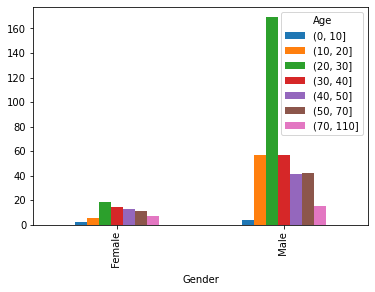

In [633]:
binned_cases.plot(kind="bar", legend=True)

<AxesSubplot:xlabel='Gender'>

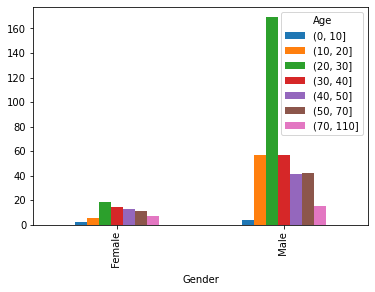

In [116]:
binned_cases.plot.bar(legend=True)

In [634]:
# add column with age bins
case_df['age_bin'] = pd.cut(case_df['Age'], bins=ages)

In [635]:
age_bin = pd.cut(case_df['Age'], bins=ages)

In [636]:
binned = pd.crosstab(age_bin,case_df['Gender'])
binned

Gender      Female   Male
Age                      
(0, 10]          2      4
(10, 20]         5     57
(20, 30]        18    169
(30, 40]        14     57
(40, 50]        13     41
(50, 70]        11     42
(70, 110]        7     15

In [637]:
a = ['0-10', '11-20','21-30', '31-40', '41-50', '51-70', '+71']
binned['Age'] =a
binned.set_index('Age', inplace=True)
binned

Gender   Female   Male
Age                   
0-10          2      4
11-20         5     57
21-30        18    169
31-40        14     57
41-50        13     41
51-70        11     42
+71           7     15

In [638]:
binned.index

Index(['0-10', '11-20', '21-30', '31-40', '41-50', '51-70', '+71'], dtype='object', name='Age')

In [126]:
'''
age_bar = plotting.figure(x_range=a, title='Victim Age Distribution', tools="wheel_zoom,reset,pan")
colors = ['#0038A8', '#e58cba']
# each category needs an x axis range
age_bar.vbar_stack([' Male', ' Female'], x=['Age', 'Age'], width=0.9, source=binned, color=colors)
show(age_bar)
'''

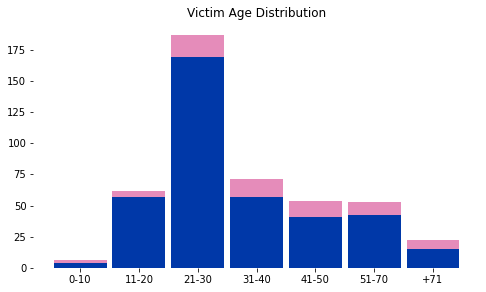

In [350]:
colors = ['#0038A8', '#e58cba'] #blue, pink
fig,ax = plt.subplots(figsize=(8, 4.5))
ax.bar(a, binned[' Male'], width=0.9, color=colors[0])
ax.bar(a, binned[' Female'], bottom=binned[' Male'], width=0.9, color=colors[1])
ax.set_title('Victim Age Distribution')
plt.xticks(range(7), a)
ax.spines[['top', 'right', 'left', 'bottom']].set_visible(False)
plt.show()

In [ ]:
binned[' Male'].sum() / (binned[' Male'].sum() + binned[' Female'].sum())

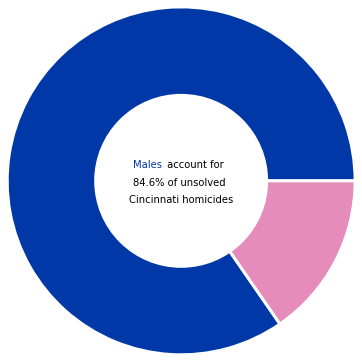

In [1138]:
plt.pie([binned[' Male'].sum(), binned[' Female'].sum()], colors=colors ,wedgeprops={'linewidth': 3, 'edgecolor': 'white' },
       pctdistance=0.2, radius=2) 
donut = plt.Circle((0,0), 1, fc='white')
plt.annotate('Males', (-0.55,0.15), color=colors[0])
plt.annotate(' account for', (-0.2,0.15))
plt.annotate('84.6% of unsolved', (-0.55,-0.05))
plt.annotate('Cincinnati homicides', (-0.6,-0.25))
fig = plt.gcf()
fig.gca().add_artist(donut)
plt.show()

In [357]:
pd.value_counts(case_df['Law enforcement agency'])

 Cincinnati Police Department                                            459
 Cincinnati Police Department / Ohio Bureau of Criminal Investigation      4
 Hamilton County Sheriff's Office                                          4
 North College Hill Police Department                                      2
 West Chester Police Department                                            1
 Hamilton County Coroner's Office                                          1
 Butler County Sheriff's Office                                            1
 Grove City Division of Police                                             1
 Loveland Police Department / Ohio Bureau of Criminal Investigation        1
 City of Oxford, Division of Police                                        1
 St. Bernard Police Department                                             1
Name: Law enforcement agency, dtype: int64

In [ ]:
case_df['Incident date'].describe()

In [361]:
years_series = pd.value_counts(case_df['Incident date'].dt.year)
years_df = pd.DataFrame({'Year': years_series.index, 'Homicide Count': years_series.values})
years_df['Year'] = years_df['Year'].astype('int')
years_df.head()

AttributeError: Can only use .dt accessor with datetimelike values

In [140]:
years_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54 entries, 0 to 53
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   Year            54 non-null     int32
 1   Homicide Count  54 non-null     int64
dtypes: int32(1), int64(1)
memory usage: 776.0 bytes


In [141]:
'''
years = [x for x in range(1950, 2023)]
date_bar = plotting.figure(x_range=(1950,2023), title='Homicides by Year', tools="wheel_zoom,reset,pan")
# each category needs an x axis range
date_bar.vbar(top=years_df['Homicide Count'], x=years_df['Year'], width=0.9)
show(date_bar)
'''

In [368]:
years_df.loc[years_df['Homicide Count'].idxmax()]

Year              2011
Homicide Count      28
Name: 0, dtype: int64

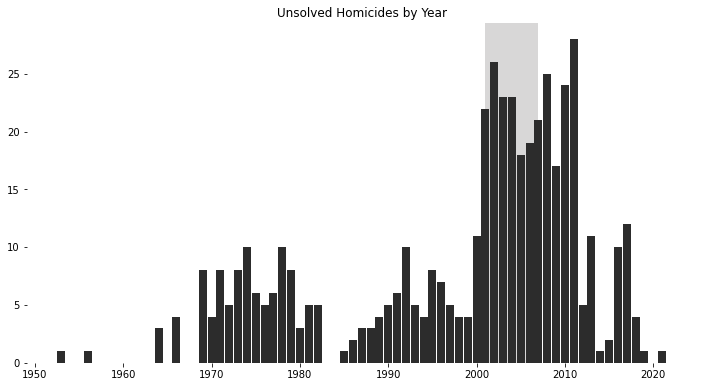

In [1179]:
fig, ax = plt.subplots(figsize=(12,6.25))
ax.axvspan(2001, 2007, facecolor='#7e7c7c10', alpha=0.3)
ax.bar(years_df['Year'], years_df['Homicide Count'], width=0.9, color='#2C2C2C')
ax.spines[['top', 'right', 'left', 'bottom']].set_visible(False)
ax.set_title('Unsolved Homicides by Year')
plt.show()

- What happened in:
    - 1984-1988
    - 1999 - 2011
    - what years were DOJ oversight program?
    - Get Homicide data for same period?
    - Why 2011 28 unsolved cases. What happened in 2011

In [142]:
months_series = pd.value_counts(case_df['Incident date'].dt.month)
months_df = pd.DataFrame({'Month': months_series.index, 'Homicide Count':months_series.values})
months_df.sort_values('Homicide Count', ascending=False, inplace=True)
months_df['Month'] = months_df['Month'].astype(int)
months_df

Month  Homicide Count
0       3              56
1      10              48
2      11              44
3       4              43
4       6              38
5      12              38
6       8              38
7       7              36
8       5              34
9       2              34
10      1              33
11      9              33

In [143]:
mo = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sept', 'Oct', 'Nov', 'Dec']
month_bar = plotting.figure(x_range=mo, title='Homicides by Month', tools="wheel_zoom,reset,pan")
# set x to index to graph sorted data
month_bar.vbar(top=months_df['Homicide Count'], x=months_df['Month'], width=0.9)
show(month_bar)

<AxesSubplot:xlabel='Month'>

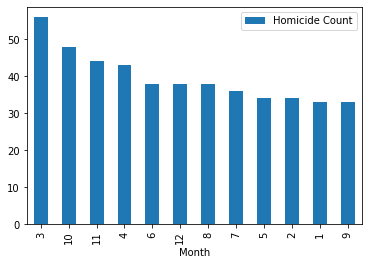

In [144]:
months_df.plot.bar(x='Month')

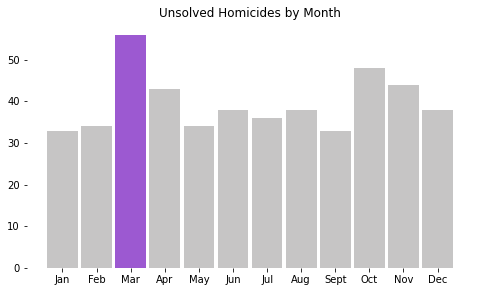

In [1184]:
# bar(color) indexes from sorted data
month_colors = ['#9C59D1','#7e7c7c70', '#7e7c7c70', '#7e7c7c70','#7e7c7c70','#7e7c7c70','#7e7c7c70','#7e7c7c70','#7e7c7c70',
                '#7e7c7c70','#7e7c7c70','#7e7c7c70',]
fig,ax = plt.subplots(figsize=(8,4.5))
ax.bar(months_df['Month'], months_df['Homicide Count'], width=0.9, color=month_colors)
# set x labels. bar(tick_label) doesn't like strings
plt.xticks(range(1,13), mo)
ax.set_title('Unsolved Homicides by Month')
ax.spines[['top', 'right', 'left', 'bottom']].set_visible(False)
plt.show()

- [x] Sort months by count
    - [x] plot months, highlight march, lowlight rest of year
## Create file save point!

In [212]:
# case_df.to_csv('OH-Homicide-case_df.csv', sep=',')

## GIS Analysis
- [ ] Street / neighborhood data
    -'STBernard'
    -'Cincinnati,'
    -'Oxford'
    - [ ] Drop Case 850, occured in San Jose, California. lol wut?
    - [x] I think I'm gonna have to do this manually. Oh well.
    - [x] convert addresses to gps coordinates. 

In [647]:
# case_df = pd.read_csv('OH-Homicide-case_df.csv', index_col='Unnamed: 0')

In [648]:
location_df = pd.DataFrame(case_df['Incident location'].str.split(pat='\n', expand=True))
location_df.columns = ['Incident location', 'state', 'county', 'date']
location_df

Incident location                 state  \
618                       3540 Reading RoadCincinnati,                   Ohio   
632                       5438 Madison RoadCincinnati,                   Ohio   
622                        201 Peete StreetCincinnati,                   Ohio   
635                          23 Back StreetCincinnati,                   Ohio   
637                     1891 Biegler StreetCincinnati,                   Ohio   
...                                                 ...                   ...   
287                    3381 Greenway AvenueCincinnati,                   Ohio   
288                    3381 Greenway AvenueCincinnati,                   Ohio   
289                    3381 Greenway AvenueCincinnati,                   Ohio   
290    2522 Wenning Road, Colerain TownshipCincinnati,                   Ohio   
3148                     S/B I-75 at 7.0 MPSt Bernard,                   Ohio   

                                  county                           date  
618                    - Hamilton County                  Incident date  
632                    - Hamilton County                  Incident date  
622                    - Hamilton County                  Incident date  
635                    - Hamilton County                  Incident date  
637                    - Hamilton County                  Incident date  
...                                  ...                            ...  
287                    - Hamilton County                  Incident date  
288                    - Hamilton County                  Incident date  
289                    - Hamilton County                  Incident date  
290                    - Hamilton County                  Incident date  
3148                   - Hamilton County                  Incident date  

[477 rows x 4 columns]

In [649]:
location_df['county'] = pd.DataFrame(location_df['county'].str.strip(to_strip='- '))
county_df.head(3)

County
618  Hamilton County
632  Hamilton County
622  Hamilton County

In [650]:
# 39 3216 3300
location_df[location_df['county']=='Butler County']

Incident location                 state  \
39     Knights Inn Motel  Interstate 75 and Tylersvi...                  Ohio   
3216      In a field at 6050 Beckett RoadWest Chester,                   Ohio   
3300                       517 Wells Mill DriveOxford,                   Ohio   

             county                           date  
39    Butler County                  Incident date  
3216  Butler County                  Incident date  
3300  Butler County                  Incident date

In [651]:
# temporary df. probably RAM inefficient
temp_df = location_df['Incident location'].str.split(pat='Cincinnati', expand=True)
temp_df

0     1
618                       3540 Reading Road    , 
632                       5438 Madison Road    , 
622                        201 Peete Street    , 
635                          23 Back Street    , 
637                     1891 Biegler Street    , 
...                                     ...   ...
287                    3381 Greenway Avenue    , 
288                    3381 Greenway Avenue    , 
289                    3381 Greenway Avenue    , 
290    2522 Wenning Road, Colerain Township    , 
3148         S/B I-75 at 7.0 MPSt Bernard,   None

[477 rows x 2 columns]

In [652]:
location_df['city'] = 'Cincinnati'

In [653]:
location_df = location_df[['Incident location', 'city', 'county', 'state', 'date']]
location_df

Incident location        city  \
618                       3540 Reading RoadCincinnati,   Cincinnati   
632                       5438 Madison RoadCincinnati,   Cincinnati   
622                        201 Peete StreetCincinnati,   Cincinnati   
635                          23 Back StreetCincinnati,   Cincinnati   
637                     1891 Biegler StreetCincinnati,   Cincinnati   
...                                                 ...         ...   
287                    3381 Greenway AvenueCincinnati,   Cincinnati   
288                    3381 Greenway AvenueCincinnati,   Cincinnati   
289                    3381 Greenway AvenueCincinnati,   Cincinnati   
290    2522 Wenning Road, Colerain TownshipCincinnati,   Cincinnati   
3148                     S/B I-75 at 7.0 MPSt Bernard,   Cincinnati   

               county                 state                           date  
618   Hamilton County                  Ohio                  Incident date  
632   Hamilton County                  Ohio                  Incident date  
622   Hamilton County                  Ohio                  Incident date  
635   Hamilton County                  Ohio                  Incident date  
637   Hamilton County                  Ohio                  Incident date  
...               ...                   ...                            ...  
287   Hamilton County                  Ohio                  Incident date  
288   Hamilton County                  Ohio                  Incident date  
289   Hamilton County                  Ohio                  Incident date  
290   Hamilton County                  Ohio                  Incident date  
3148  Hamilton County                  Ohio                  Incident date  

[477 rows x 5 columns]

In [654]:
location_df['Incident location'] = temp_df[0]
location_df.head(3)

Incident location        city           county                 state  \
618   3540 Reading Road  Cincinnati  Hamilton County                  Ohio   
632   5438 Madison Road  Cincinnati  Hamilton County                  Ohio   
622    201 Peete Street  Cincinnati  Hamilton County                  Ohio   

                              date  
618                  Incident date  
632                  Incident date  
622                  Incident date

- [ ] Manually fix non-Cinci entries found by skimming data
    - Case #s 39, 3216, 3300, 290, 3148, 1252, 66
    - [x] adjust addresses
    - [ ] ensure correct cities have been linked

In [655]:
location_df.loc[[39, 3216, 3300, 290, 3148, 1252, 66]]

Incident location        city  \
39     Knights Inn Motel  Interstate 75 and Tylersvi...  Cincinnati   
3216      In a field at 6050 Beckett RoadWest Chester,   Cincinnati   
3300                       517 Wells Mill DriveOxford,   Cincinnati   
290                2522 Wenning Road, Colerain Township  Cincinnati   
3148                     S/B I-75 at 7.0 MPSt Bernard,   Cincinnati   
1252   In the area of 3300 Queen Anne PlaceGrove City,   Cincinnati   
66     Little Miami River/ E. Kemper Road-Riverside ...  Cincinnati   

               county                 state                           date  
39      Butler County                  Ohio                  Incident date  
3216    Butler County                  Ohio                  Incident date  
3300    Butler County                  Ohio                  Incident date  
290   Hamilton County                  Ohio                  Incident date  
3148  Hamilton County                  Ohio                  Incident date  
1252  Franklin County                  Ohio                  Incident date  
66    Hamilton County                  Ohio                  Incident date

In [656]:
case_citis = {39: 'West Chester', 3216: 'West Chester', 3300: 'Oxford', 290: 'Colerain Township',
                3148: 'St. Bernard' , 1252: ' Grove City', 66: 'Loveland'}
case_cities_df = pd.DataFrame({'city': case_cities}, index=case_cities.keys())

In [657]:
# print out list so I can manually edit the text into a dict
temp_list = list(location_df['Incident location'].loc[[39, 3216, 3300, 290, 3148, 1252, 66]])
temp_list

[' Knights Inn Motel  Interstate 75 and Tylersville RdUnion Township (now known as West Chester), ',
 ' In a field at 6050 Beckett RoadWest Chester, ',
 ' 517 Wells Mill DriveOxford, ',
 ' 2522 Wenning Road, Colerain Township',
 ' S/B I-75 at 7.0 MPSt Bernard, ',
 ' In the area of 3300 Queen Anne PlaceGrove City, ',
 ' Little Miami River/ E. Kemper Road-Riverside DriveLoveland, ']

In [658]:
# manually clean up the location information
temp_loc = {' Knights Inn Motel  Interstate 75 and Tylersville RdUnion Township (now known as West Chester), ':
            'I-75 and Tylersville Rd',
            ' In a field at 6050 Beckett RoadWest Chester, ':
            '6050 Beckett Road',
            ' 517 Wells Mill DriveOxford, ':
            '517 Wells Mill Drive',
            ' 2522 Wenning Road, Colerain Township':
            '2522 Wenning Road',
            ' S/B I-75 at 7.0 MPSt Bernard, ':
            'S/B I-75 at 7.0 MP',
            ' In the area of 3300 Queen Anne PlaceGrove City, ':
            '3300 Queen Anne Place',
            ' Little Miami River/ E. Kemper Road-Riverside DriveLoveland':
            'Little Miami River/ E. Kemper Road'}

In [659]:
location_df.loc[case_cities.keys()]

Incident location        city  \
39     Knights Inn Motel  Interstate 75 and Tylersvi...  Cincinnati   
3216      In a field at 6050 Beckett RoadWest Chester,   Cincinnati   
3300                       517 Wells Mill DriveOxford,   Cincinnati   
290                2522 Wenning Road, Colerain Township  Cincinnati   
3148                     S/B I-75 at 7.0 MPSt Bernard,   Cincinnati   
1252   In the area of 3300 Queen Anne PlaceGrove City,   Cincinnati   
66     Little Miami River/ E. Kemper Road-Riverside ...  Cincinnati   

               county                 state                           date  
39      Butler County                  Ohio                  Incident date  
3216    Butler County                  Ohio                  Incident date  
3300    Butler County                  Ohio                  Incident date  
290   Hamilton County                  Ohio                  Incident date  
3148  Hamilton County                  Ohio                  Incident date  
1252  Franklin County                  Ohio                  Incident date  
66    Hamilton County                  Ohio                  Incident date

In [660]:
location_df.replace({'Incident location': temp_loc}, inplace=True)

In [661]:
location_df.loc[case_cities.keys()]

Incident location        city  \
39                              I-75 and Tylersville Rd  Cincinnati   
3216                                  6050 Beckett Road  Cincinnati   
3300                               517 Wells Mill Drive  Cincinnati   
290                                   2522 Wenning Road  Cincinnati   
3148                                 S/B I-75 at 7.0 MP  Cincinnati   
1252                              3300 Queen Anne Place  Cincinnati   
66     Little Miami River/ E. Kemper Road-Riverside ...  Cincinnati   

               county                 state                           date  
39      Butler County                  Ohio                  Incident date  
3216    Butler County                  Ohio                  Incident date  
3300    Butler County                  Ohio                  Incident date  
290   Hamilton County                  Ohio                  Incident date  
3148  Hamilton County                  Ohio                  Incident date  
1252  Franklin County                  Ohio                  Incident date  
66    Hamilton County                  Ohio                  Incident date

In [662]:
case_cities_df

city
39         West Chester
3216       West Chester
3300             Oxford
290   Colerain Township
3148        St. Bernard
1252         Grove City
66             Loveland

In [663]:
#l = pd.DataFrame(location_df.copy())
location_df['city'].update(case_cities_df['city'])
location_df.loc[66]

Incident location     Little Miami River/ E. Kemper Road-Riverside ...
city                                                          Loveland
county                                                 Hamilton County
state                                                             Ohio
date                                                     Incident date
Name: 66, dtype: object

In [469]:
# location_df['Incident location'].to_csv('Incident location.csv')

In [664]:
incident_gps = pd.read_csv('Incident-location-gps.csv', sep=',', index_col='case')
incident_gps.head(3)

Incident location   latitude  longitude
case                                         
618   3540 Reading Road  39.145773 -84.489590
632   5438 Madison Road  39.161592 -84.399650
622    201 Peete Street  39.115538 -84.513352

In [665]:
location_df

Incident location               city           county  \
618       3540 Reading Road         Cincinnati  Hamilton County   
632       5438 Madison Road         Cincinnati  Hamilton County   
622        201 Peete Street         Cincinnati  Hamilton County   
635          23 Back Street         Cincinnati  Hamilton County   
637     1891 Biegler Street         Cincinnati  Hamilton County   
...                     ...                ...              ...   
287    3381 Greenway Avenue         Cincinnati  Hamilton County   
288    3381 Greenway Avenue         Cincinnati  Hamilton County   
289    3381 Greenway Avenue         Cincinnati  Hamilton County   
290       2522 Wenning Road  Colerain Township  Hamilton County   
3148     S/B I-75 at 7.0 MP        St. Bernard  Hamilton County   

                     state                           date  
618                   Ohio                  Incident date  
632                   Ohio                  Incident date  
622                   Ohio                  Incident date  
635                   Ohio                  Incident date  
637                   Ohio                  Incident date  
...                    ...                            ...  
287                   Ohio                  Incident date  
288                   Ohio                  Incident date  
289                   Ohio                  Incident date  
290                   Ohio                  Incident date  
3148                  Ohio                  Incident date  

[477 rows x 5 columns]

In [666]:
incident_gps.columns.difference(location_df.columns)

Index(['latitude', 'longitude'], dtype='object')

In [667]:
#l_df = location_df.copy()
# find the index.difference between incident gps and locations to only add  new data columns
cols = list(incident_gps.columns.difference(location_df.columns))
pd.concat([location_df, incident_gps[cols]], axis=1) 

Incident location               city           county  \
618       3540 Reading Road         Cincinnati  Hamilton County   
632       5438 Madison Road         Cincinnati  Hamilton County   
622        201 Peete Street         Cincinnati  Hamilton County   
635          23 Back Street         Cincinnati  Hamilton County   
637     1891 Biegler Street         Cincinnati  Hamilton County   
...                     ...                ...              ...   
287    3381 Greenway Avenue         Cincinnati  Hamilton County   
288    3381 Greenway Avenue         Cincinnati  Hamilton County   
289    3381 Greenway Avenue         Cincinnati  Hamilton County   
290       2522 Wenning Road  Colerain Township  Hamilton County   
3148     S/B I-75 at 7.0 MP        St. Bernard  Hamilton County   

                     state                           date   latitude  \
618                   Ohio                  Incident date  39.145773   
632                   Ohio                  Incident date  39.161592   
622                   Ohio                  Incident date  39.115538   
635                   Ohio                  Incident date  39.114979   
637                   Ohio                  Incident date  39.128551   
...                    ...                            ...        ...   
287                   Ohio                  Incident date  39.148813   
288                   Ohio                  Incident date  39.148813   
289                   Ohio                  Incident date  39.148813   
290                   Ohio                  Incident date  39.248750   
3148                  Ohio                  Incident date  39.177962   

      longitude  
618  -84.489590  
632  -84.399650  
622  -84.513352  
635  -84.515423  
637  -84.562347  
...         ...  
287  -84.630633  
288  -84.630633  
289  -84.630633  
290  -84.570081  
3148 -84.487039  

[477 rows x 7 columns]

In [668]:
case_df.update(location_df['Incident location'], overwrite=True)
case_df.head(3)

Case number   Incident location Incident date Homicide date Gender  \
618          618   3540 Reading Road    2011-01-02      1/2/2011   Male   
632          632   5438 Madison Road    2011-05-26     5/26/2011   Male   
622          622    201 Peete Street    2011-03-01      3/1/2011   Male   

    Race/Ethnicity         Law enforcement agency  \
618          Black   Cincinnati Police Department   
632          Black   Cincinnati Police Department   
622          Black   Cincinnati Police Department   

                                               details   Age Hair color  \
618   Twenty two year old Rafeal Ross was shot at 3...  22.0        NaN   
632   Nineteen year old David Gould was shot at 438...  19.0        NaN   
622   Twenty five year old Patrick Massey was shot ...  25.0        NaN   

    Eye color Nickname or alias Date of birth Height Weight   age_bin  
618       NaN               NaN           NaN    NaN    NaN  (20, 30]  
632       NaN               NaN           NaN    NaN    NaN  (10, 20]  
622       NaN               NaN           NaN    NaN    NaN  (20, 30]

In [669]:
incident_gps.head()

Incident location   latitude  longitude
case                                           
618     3540 Reading Road  39.145773 -84.489590
632     5438 Madison Road  39.161592 -84.399650
622      201 Peete Street  39.115538 -84.513352
635        23 Back Street  39.114979 -84.515423
637   1891 Biegler Street  39.128551 -84.562347

In [670]:
cols2 = list(incident_gps.columns.difference(case_df.columns))
case_df = pd.concat([case_df, incident_gps[cols2]], axis=1)
case_df = pd.concat([case_df, location_df[['city', 'state']]], axis=1)
case_df.head(3)

Case number   Incident location Incident date Homicide date Gender  \
618          618   3540 Reading Road    2011-01-02      1/2/2011   Male   
632          632   5438 Madison Road    2011-05-26     5/26/2011   Male   
622          622    201 Peete Street    2011-03-01      3/1/2011   Male   

    Race/Ethnicity         Law enforcement agency  \
618          Black   Cincinnati Police Department   
632          Black   Cincinnati Police Department   
622          Black   Cincinnati Police Department   

                                               details   Age Hair color  \
618   Twenty two year old Rafeal Ross was shot at 3...  22.0        NaN   
632   Nineteen year old David Gould was shot at 438...  19.0        NaN   
622   Twenty five year old Patrick Massey was shot ...  25.0        NaN   

    Eye color Nickname or alias Date of birth Height Weight   age_bin  \
618       NaN               NaN           NaN    NaN    NaN  (20, 30]   
632       NaN               NaN           NaN    NaN    NaN  (10, 20]   
622       NaN               NaN           NaN    NaN    NaN  (20, 30]   

      latitude  longitude        city                 state  
618  39.145773 -84.489590  Cincinnati                  Ohio  
632  39.161592 -84.399650  Cincinnati                  Ohio  
622  39.115538 -84.513352  Cincinnati                  Ohio

In [671]:
# case_df.to_csv('cleaned-case-data.csv', sep=',')

In [997]:
case_map_df = case_df.dropna(subset=['latitude', 'longitude'])

In [998]:
case_map_df[case_map_df['latitude'].isna()==True]

Empty DataFrame
Columns: [Case number, Incident location, Incident date, Homicide date, Gender, Race/Ethnicity, Law enforcement agency, details, Age, Hair color, Eye color, Nickname or alias, Date of birth, Height, Weight, age_bin, latitude, longitude, city, state]
Index: []

In [674]:
bounds = [[39.00164834007386, -84.83564412386342], # SW corner to NE corner
          [39.34943767762469, -84.24323404504084]]
m = folium.Map(location=[39.103119,-84.512016], zoom_start=11)
#m.fit_bounds(bounds[0], bounds[1])
# m

In [677]:
def add_marker(df, map_obj, color_dict):
    ''' expects a dataframe that at least has ['name', 'latitude', 'longitude'] and
    a map object to place them. returns a map with markers'''
    cases = list(df.index)
    for case in cases :
        folium.Marker(
            location=[df.loc[case]['latitude'], df.loc[case]['longitude']],
            popup=df.loc[case]['details'],
            icon=folium.Icon(color=color_dict[case_map_df.loc[x]['date bin']], icon="info-sign")
        ).add_to(map_obj)
    return map_obj

In [584]:
cases = list(case_map_df.index)
for case in cases:
    folium.Marker(
        location=[case_map_df.loc[case]['latitude'], case_map_df.loc[case]['longitude']],
        popup=case_map_df.loc[case]['details']
    ).add_to(m)

In [682]:
add_marker(case_map_df, m)

# fix cases
842  
803  
1049  
3123  
3116  
788  
1015  
1121  
715  
1116  
1119  
1252  
1075  
688  
1094  
987  
704  
1075  
## incident date
650  
676

In [ ]:
marker_colors = ['#DA7AAC', '#e58cba', '#f7add3', '#ffcde7', 'FCDDED', # pink, --> faint pink
                '#0038A8', '#1267ba', '#2f67d7', '#457cea', '#6597fa' ] # blue --> faint blue. border #b6c3deff

In [999]:
case_bins = ['1950-01-01', '2007-01-01','2012-01-01','2015-01-01','2020-01-01','2025-01-01']
case_bins = pd.to_datetime(case_bins)

In [1000]:
case_df['Incident date'] = pd.to_datetime(case_df['Incident date'])
case_df['Incident date'].dtype

dtype('<M8[ns]')

In [995]:
case_df['Incident date']

618    2011-01-02
632    2011-05-26
622    2011-03-01
635    2011-06-26
637    2011-07-22
          ...    
287    1966-09-25
288    1966-09-25
289    1966-09-25
290    2010-06-11
3148   2005-02-15
Name: Incident date, Length: 475, dtype: datetime64[ns]

In [1001]:
case_df.dropna(subset='Incident date', inplace=True)
case_df[case_df['Incident date'].isna()==True]

Empty DataFrame
Columns: [Case number, Incident location, Incident date, Homicide date, Gender, Race/Ethnicity, Law enforcement agency, details, Age, Hair color, Eye color, Nickname or alias, Date of birth, Height, Weight, age_bin, latitude, longitude, city, state]
Index: []

In [1002]:
case_age_df = pd.DataFrame(pd.cut(case_df['Incident date'], bins=case_bins))
case_age_df.columns = ['date bin']
case_age_df.head()

date bin
618  (2007-01-01, 2012-01-01]
632  (2007-01-01, 2012-01-01]
622  (2007-01-01, 2012-01-01]
635  (2007-01-01, 2012-01-01]
637  (2007-01-01, 2012-01-01]

In [1003]:
pd.unique(case_age_df['date bin'])

[(2007-01-01, 2012-01-01], (1950-01-01, 2007-01-01], (2012-01-01, 2015-01-01], (2015-01-01, 2020-01-01], (2020-01-01, 2025-01-01]]
Categories (5, interval[datetime64[ns], right]): [(1950-01-01, 2007-01-01] < (2007-01-01, 2012-01-01] < (2012-01-01, 2015-01-01] < (2015-01-01, 2020-01-01] < (2020-01-01, 2025-01-01]]

In [1004]:
case_dates = {'(1950-01-01, 2007-01-01]': '+15','(2007-01-01, 2012-01-01]': '10-14','(2012-01-01, 2015-01-01]': '7-9',
              '(2015-01-01, 2020-01-01]': '2-6','(2020-01-01, 2025-01-01]': '<2'}

In [1005]:
case_age_df[case_age_df['date bin'].isna()==True]

Empty DataFrame
Columns: [date bin]
Index: []

In [1006]:
case_age_df['date bin'] = case_age_df['date bin'].astype(str)
case_age_df.head()

date bin
618  (2007-01-01, 2012-01-01]
632  (2007-01-01, 2012-01-01]
622  (2007-01-01, 2012-01-01]
635  (2007-01-01, 2012-01-01]
637  (2007-01-01, 2012-01-01]

In [1009]:
case_age_df.replace(case_dates, inplace=True)
case_age_df.head(3)

date bin
618     10-14
632     10-14
622     10-14
635     10-14
637     10-14
...       ...
287       +15
288       +15
289       +15
290     10-14
3148      +15

[475 rows x 1 columns]

In [1008]:
case_map_df = pd.concat([case_map_df, case_age_df['date bin']], axis=1)
case_map_df.head(3)

Case number   Incident location Incident date Homicide date Gender  \
618        618.0   3540 Reading Road    2011-01-02      1/2/2011   Male   
632        632.0   5438 Madison Road    2011-05-26     5/26/2011   Male   
622        622.0    201 Peete Street    2011-03-01      3/1/2011   Male   

    Race/Ethnicity         Law enforcement agency  \
618          Black   Cincinnati Police Department   
632          Black   Cincinnati Police Department   
622          Black   Cincinnati Police Department   

                                               details   Age Hair color  ...  \
618   Twenty two year old Rafeal Ross was shot at 3...  22.0        NaN  ...   
632   Nineteen year old David Gould was shot at 438...  19.0        NaN  ...   
622   Twenty five year old Patrick Massey was shot ...  25.0        NaN  ...   

    Nickname or alias Date of birth Height Weight   age_bin   latitude  \
618               NaN           NaN    NaN    NaN  (20, 30]  39.145773   
632               NaN           NaN    NaN    NaN  (10, 20]  39.161592   
622               NaN           NaN    NaN    NaN  (20, 30]  39.115538   

     longitude        city                 state date bin  
618 -84.489590  Cincinnati                  Ohio    10-14  
632 -84.399650  Cincinnati                  Ohio    10-14  
622 -84.513352  Cincinnati                  Ohio    10-14  

[3 rows x 21 columns]

In [1170]:
blues = {'<2':'#0038A8', '2-6':'#0038A8D8', '7-9':'#0038A8BF','10-14': '#0038A840','+15': '#0038A820', 'edge': '#8aa0ca'}
pinks = {'<2':'#DA7AAC', '2-6':'#DA7AACD8', '7-9':'#DA7AACBF','10-14': '#DA7AAC40','+15': '#DA7AAC20', 'edge' :'#e58cbaBF'}  #'#D5BECA'

In [791]:
folium.Marker(
    location=[case_map_df.loc[632]['latitude'], case_map_df.loc[632]['longitude']],
    popup=case_map_df.loc[632]['details'],
    icon=folium.Icon(color=blues[case_map_df.loc[632]['date bin']], icon="info-sign")
).add_to(t)

In [ ]:
3129, 1187,3308

In [901]:
t = folium.Map(location=[39.103119,-84.512016], zoom_start=11)
for x in [632, 3129, 1187, 3308, 837]:
    folium.Marker(
        location=[case_map_df.loc[x]['latitude'], case_map_df.loc[x]['longitude']],
        popup=case_map_df.loc[x]['Incident date'], icon=folium.Icon(color=blues[case_map_df.loc[x]['date bin']], icon="info-sign")
    ).add_to(t)

In [902]:
circle = folium.CircleMarker((case_map_df.loc[618]['latitude'], case_map_df.loc[618]['longitude']), radius=10,
                             color='#DA7AAC', fill_color='#DA7AAC', fill_opacity=0.85)
circle.add_to(t)

In [903]:
t

In [1162]:
def add_circles(df, map_obj, color_dict):
    ''' expects a dataframe that at least has ['name', 'latitude', 'longitude'], 
    a map object to place them, and a dict of category colors. returns a map with markers'''
    cases = list(df.index)
    for case in cases :
        folium.CircleMarker(
            location=[df.loc[case]['latitude'], df.loc[case]['longitude']],
            radius=7, popup=folium.Popup(str(df.loc[case]['details']), max_width=450),
            color=color_dict['edge'], # color_dict[df.loc[case]['date bin']],
            fill_color=color_dict[df.loc[case]['date bin']],
            fill_opacity=1
        ).add_to(map_obj)
    return map_obj        

In [945]:
gender_df = case_map_df.groupby('Gender')
gender_df.describe()

Case number                                                        \
              count         mean         std   min    25%     50%     75%   
Gender                                                                      
 Female        75.0   996.133333  643.950505  66.0  729.5   778.0  1076.5   
 Male         389.0  1195.573265  720.084215  39.0  795.0  1038.0  1148.0   

                   Age             ...   latitude            longitude  \
            max  count       mean  ...        75%        max     count   
Gender                             ...                                   
 Female  3300.0   68.0  41.573529  ...  39.155561  40.729863      75.0   
 Male    3308.0  380.0  33.105921  ...  39.160319  44.961333     389.0   

                                                                           \
              mean       std         min        25%        50%        75%   
Gender                                                                      
 Female -84.203773  1.712900  -84.752385 -84.524631 -84.510408 -84.476331   
 Male   -84.612878  2.449624 -119.719685 -84.529398 -84.513352 -84.487330   

                    
               max  
Gender              
 Female -73.978367  
 Male   -73.994253  

[2 rows x 32 columns]

In [1013]:
males_df = case_map_df[case_map_df['Gender']==' Male']

In [1014]:
males_df[males_df['date bin'].isna()==True]

Empty DataFrame
Columns: [Case number, Incident location, Incident date, Homicide date, Gender, Race/Ethnicity, Law enforcement agency, details, Age, Hair color, Eye color, Nickname or alias, Date of birth, Height, Weight, age_bin, latitude, longitude, city, state, date bin]
Index: []

[0 rows x 21 columns]

In [1017]:
female_df = case_map_df[case_map_df['Gender']==' Female']

In [1038]:
gender_map = folium.Map(location=[39.103119,-84.512016], tiles="Stamen Toner", zoom_start=11)

In [1171]:
add_circles(males_df, gender_map, blues)

In [1169]:
add_circles(female_df, gender_map, pinks)

In [1041]:
gender_map.save("Unsolved-Homicides-by-Gender.html")

In [1046]:
case_df.groupby('Race/Ethnicity').size()

Race/Ethnicity
 Asian         1
 Black       343
 Hispanic      1
 White       119
dtype: int64

In [1063]:
by_race = pd.DataFrame(case_df.groupby('Race/Ethnicity').size()).transpose()

In [1094]:
by_race.columns

Index([' Asian', ' Black', ' Hispanic', ' White'], dtype='object', name='Race/Ethnicity')

In [1113]:
by_race[' Black'] / by_race.iloc[0].sum()

0    0.739224
Name:  Black, dtype: float64

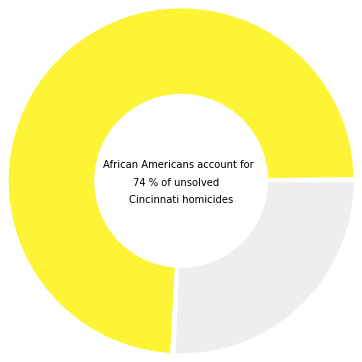

In [1156]:
colors2 = ['#cc94f8', '#FCF434', '#99b9fa', '#7e7c7c20'] # ' Asian', ' Black', ' Hispanic', ' White'
plt.pie(by_race.iloc[0], colors=colors2 ,wedgeprops={'linewidth': 3, 'edgecolor': 'white' },
       pctdistance=0.2, radius=2) 
donut = plt.Circle((0,0), 1, fc='white')
plt.annotate('African Americans', (-0.9,0.15))
plt.annotate(' account for', (0.15,0.15))
plt.annotate('74 % of unsolved', (-0.55,-0.05))
plt.annotate('Cincinnati homicides', (-0.6,-0.25))
fig = plt.gcf()
fig.gca().add_artist(donut)
plt.show() 

In [ ]:
'''
isa_colors = ['yellow' = '#FCF434'
'dark yellow' = '#e4de49'
'lavender' = '#cc94f8'
'purple' = '#9C59D1'
'dark purple' = '#401066'
'charcoal' = '#7e7c7c'
'black' = '#2C2C2C'
'light pink'= '#e58cba'
'pink' = '#D60270'
'periwinkle' = '#99b9fa'
'blue' = '#0038A8'
'''

In [836]:

blue1 = r"""<?xml version="1.0" encoding="UTF-8" standalone="no"?>
<svg
   xmlns:dc="http://purl.org/dc/elements/1.1/"
   xmlns:cc="http://creativecommons.org/ns#"
   xmlns:rdf="http://www.w3.org/1999/02/22-rdf-syntax-ns#"
   xmlns:svg="http://www.w3.org/2000/svg"
   xmlns="http://www.w3.org/2000/svg"
   xmlns:sodipodi="http://sodipodi.sourceforge.net/DTD/sodipodi-0.dtd"
   xmlns:inkscape="http://www.inkscape.org/namespaces/inkscape"
   viewBox="0 0 500 820"
   version="1.1"
   xml:space="preserve"
   style="fill-rule: evenodd; clip-rule: evenodd; stroke-linecap: round;"
   id="svg18"
   sodipodi:docname="blue1_marker.svg"
   inkscape:version="1.0.2-2 (e86c870879, 2021-01-15)"><metadata
     id="metadata22"><rdf:RDF><cc:Work
         rdf:about=""><dc:format>image/svg+xml</dc:format><dc:type
           rdf:resource="http://purl.org/dc/dcmitype/StillImage" /><dc:title></dc:title></cc:Work></rdf:RDF></metadata><sodipodi:namedview
     pagecolor="#ffffff"
     bordercolor="#666666"
     borderopacity="1"
     objecttolerance="10"
     gridtolerance="10"
     guidetolerance="10"
     inkscape:pageopacity="0"
     inkscape:pageshadow="2"
     inkscape:window-width="1920"
     inkscape:window-height="1017"
     id="namedview20"
     showgrid="false"
     inkscape:zoom="0.89634146"
     inkscape:cx="250"
     inkscape:cy="410"
     inkscape:window-x="-8"
     inkscape:window-y="-8"
     inkscape:window-maximized="1"
     inkscape:current-layer="svg18" /><defs
     id="defs12"><linearGradient
       x1="0"
       y1="0"
       x2="1"
       y2="0"
       gradientUnits="userSpaceOnUse"
       gradientTransform="matrix(2.30025e-15,-37.566,37.566,2.30025e-15,416.455,540.999)"
       id="map-marker-38-f"><stop
         offset="0"
         stop-color="rgb(18,111,198)"
         id="stop2" /><stop
         offset="1"
         stop-color="rgb(76,156,209)"
         id="stop4" /></linearGradient><linearGradient
       x1="0"
       y1="0"
       x2="1"
       y2="0"
       gradientUnits="userSpaceOnUse"
       gradientTransform="matrix(1.16666e-15,-19.053,19.053,1.16666e-15,414.482,522.486)"
       id="map-marker-38-s"><stop
         offset="0"
         stop-color="rgb(46,108,151)"
         id="stop7" /><stop
         offset="1"
         stop-color="rgb(56,131,183)"
         id="stop9" /></linearGradient></defs><g
     transform="matrix(19.5417,0,0,19.5417,-7889.1,-9807.44)"
     id="g16"
     style="fill:#0038a8;fill-opacity:1;stroke:#b6c3de;stroke-opacity:1"><path
       d="M416.544,503.612C409.971,503.612 404.5,509.303 404.5,515.478C404.5,518.256 406.064,521.786 407.194,524.224L416.5,542.096L425.762,524.224C426.892,521.786 428.5,518.433 428.5,515.478C428.5,509.303 423.117,503.612 416.544,503.612ZM416.544,510.767C419.128,510.784 421.223,512.889 421.223,515.477C421.223,518.065 419.128,520.14 416.544,520.156C413.96,520.139 411.865,518.066 411.865,515.477C411.865,512.889 413.96,510.784 416.544,510.767Z"
       stroke-width="1.1px"
       fill="url(#map-marker-38-f)"
       stroke="url(#map-marker-38-s)"
       id="path14"
       style="fill:#0038a8;fill-opacity:1;stroke:#b6c3de;stroke-opacity:1" /></g></svg>
"""

In [875]:
blue2=r'C:\Users\Owner\Documents\Jupyter Notebooks\IsabelsRepo\unsolved-homicide-markers\blue2_marker.svg'